
# BioLGCA - A Mesosocopic Modelling Framework for Collective Phenomena
### Introduction
This Juypter notebook serves as an introduction to the BioLGCA python package. It consists of lattice-gas cellular automaton models for biological systems in 1D and 2D, which can be adapted, simulated and analyzed. First, visualization and simulation methods are introduced. Next, already implemented LGCA models are presented and analyzed. We conclude with a demonstration on how to code and use your own interactions in the BioLGCA framework.

### Class initialization
### Calling the class
To envoke the package and obtain the appropriate class instance, the function get_lgca of the base.py module is used


In [5]:
# we use inline plotting and switch to the 'notebook' backend later to show animations
%matplotlib inline  
from simulations import get_lgca
lgca = get_lgca(geometry='hex')

Random walk interaction is used.


### Setting an interaction
Note that we did not specify the lattice dimensions or an interaction rule, so the default parameters are used, which is a random walk on a hexagonal lattice. We can set specific interactions using `interaction=`, the lattice dimensions using `dims=`, boundary conditions with `bc=`, and interaction parameters and more using keyword arguments.

In [6]:
lgca = get_lgca(geometry='hex', dims=(10, 10), interaction='aggregation')

sensitivity set to beta =  2.0


In [4]:
lgca = get_lgca(geometry='hex', dims=(40,40), interaction='go_and_grow', beta=10.0)

birth rate set to r_b =  0.2


We now used the aggregation rule, which uses a sensitivity parameter `beta`, which is set to 2 by default. All available interactions can be printed using the class method `get_interactions` . 

In [7]:
lgca.get_interactions() 

['go_and_grow', 'go_or_grow', 'alignment', 'aggregation', 'random_walk', 'excitable_medium', 'nematic', 'persistant_motion', 'chemotaxis', 'contact_guidance']


The interaction can also be changed after initialization using the `set_interaction` method:

In [4]:
lgca.set_interaction(interaction='alignment', beta=3.0)

### Setting the initial state
By default, the initial state is a homogeneous state with constant mean density, that can be set using the density keyword. For density = 0.1 every channel on the lattice is occupied with a probability of . The state of the lgca class instance is saved in the array nodes. For example, for a 1D LGCA of size 5, without rest channels and with a homogeneous initial state, where each channel is occupied with a probability $\rho$ = 0.1, we use


In [5]:
lgca = get_lgca(restchannels=0, density=0.1, dims=5, geometry='lin', bc='refl')

Random walk interaction is used.


We can print the current state as:

In [6]:
lgca.print_nodes()

[[0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]]


### Simulating the system
A single time step without recording is performed with the `timestep` method:

In [7]:
lgca.timestep()
lgca.print_nodes()

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


To simulate the dynamics for longer times and record the steps we use the class method `timeevo`. It takes the keyword arguments `timesteps`, that sets the number of time steps to simulate. Also, all configurations can be recorded using `record=True`. To only record the density profile set `recorddens=True`. The total number of cells can be recorded with `recordN=True`, which is also the default.

In [8]:
lgca.timeevo(timesteps=100)
lgca.print_nodes()

Progress: [####################] 100% Done...
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]]


# Visualization
Visualization and plotting are different for 1D and 2D lattice geometries. The following section only applies to the 2D lattices, and the 1D equivalent is mentioned later.
## Plotting
### Density profile
The python package offers several methods to visualize LGCA states. A simple method is plotting the current density profile

Consider a LGCA on a square lattice,

Random walk interaction is used.


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (6).

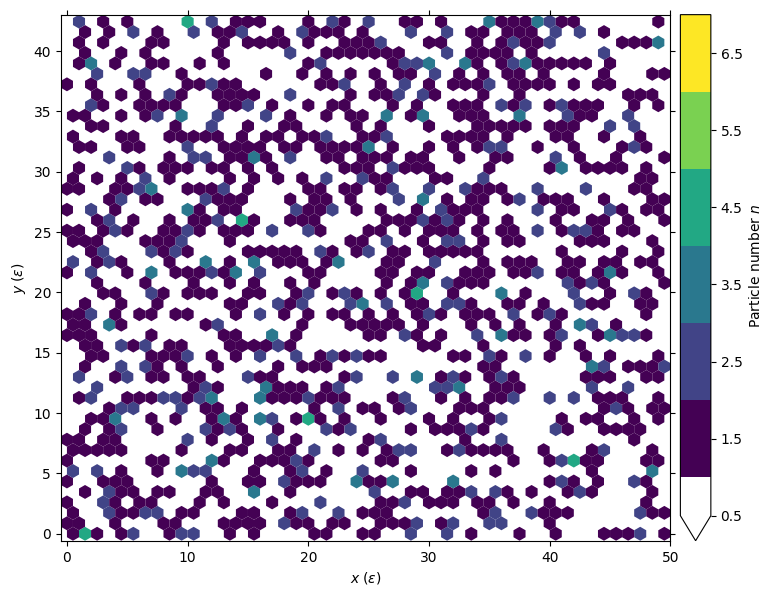

In [20]:
lgca = get_lgca(geometry='hex')
lgca.plot_density()

(<Figure size 800x700 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x7ff7a091c040>)

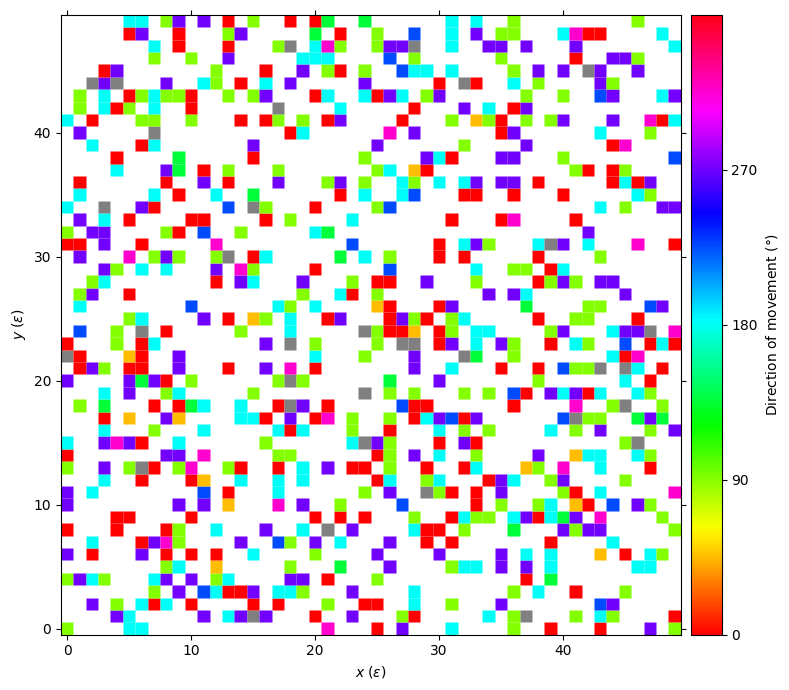

In [10]:
lgca.plot_flux()


(<Figure size 800x800 with 1 Axes>,
 <matplotlib.quiver.Quiver at 0x7ff7a13584f0>)

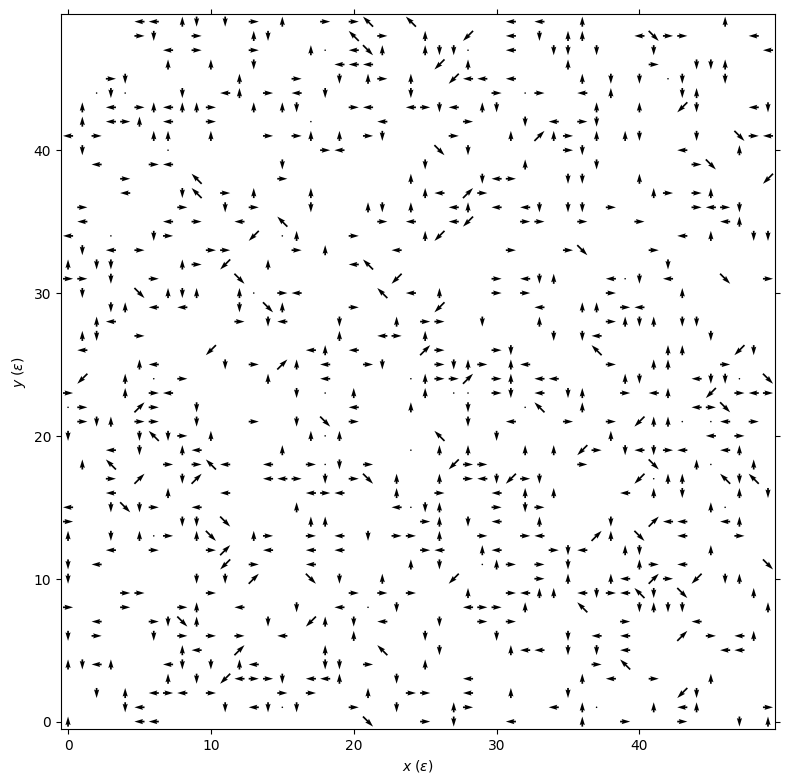

In [11]:
lgca.plot_flow()


sensitivity set to beta =  5.0


(<Figure size 800x800 with 1 Axes>,
 <matplotlib.quiver.Quiver at 0x7ff7a4297910>)

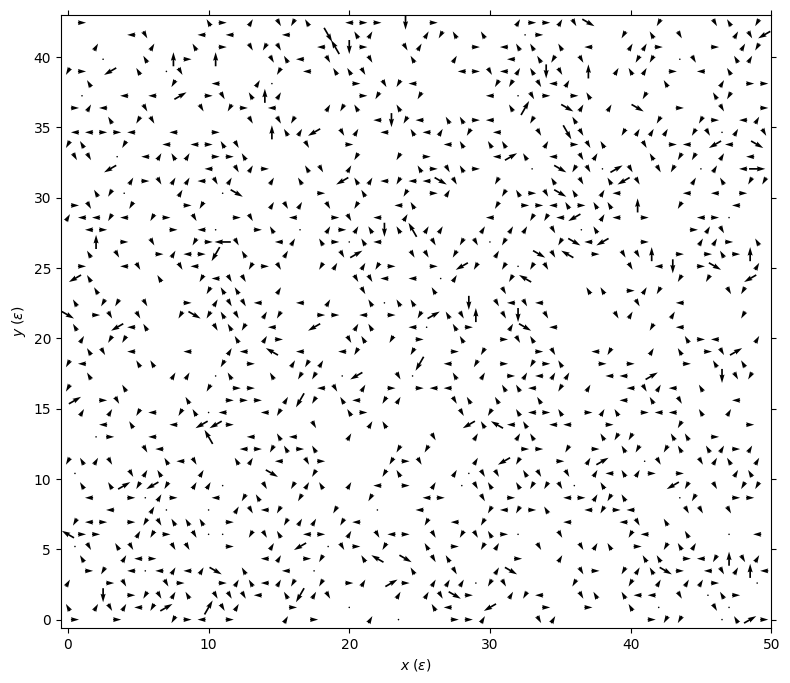

In [19]:
lgca.set_interaction(interaction='chemotaxis')
# ani = lgca.live_animate_flux()
lgca.plot_flow()

sensitivity set to beta =  5.0


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (6).

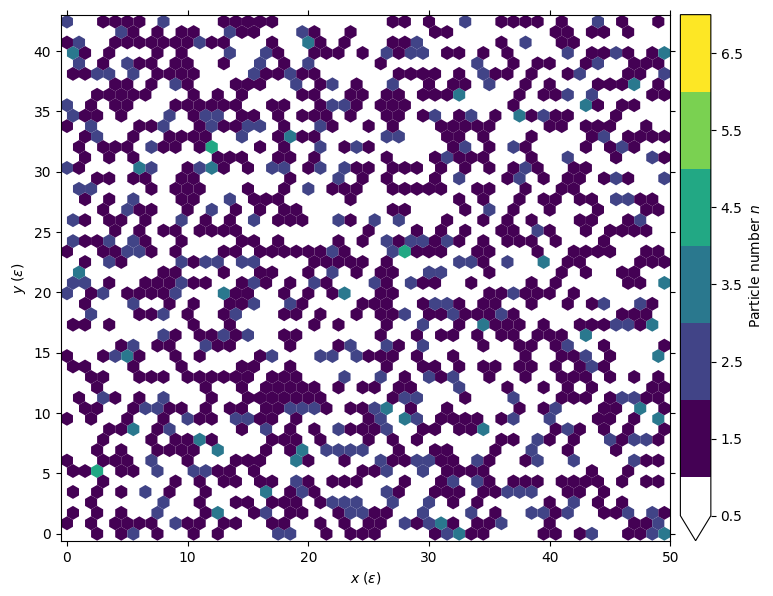

In [15]:
lgca = get_lgca(interaction='chemotaxis')
lgca.live_animate_density()